# Capstone Two - Pre-processing and Training Data Development

The enclosed represents Chapter 16.3 of the Springboard Data Scientist Career Track. The structure is as follows:
   * Creating Dummy Variables
   * Splitting the Data into Training & Testing subsets for Machine Learning
   * Standardized Scaling

I hope this submission shows that I understand when to apply the proper steps.

This code is built in Jupyter Notebook & uploaded on Github.


# Pre work

**Importing the relevant libraries to start**

In [1]:
#Import the necessary tools required in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os
import lxml
import datetime
import requests
import json
import collections
import seaborn as sns
from scipy import stats
import numpy as np


# 1.0 Reassessing the input

We will import the dataframe from the previous Exploratory Data Analysis ( EDA ) section.

In [2]:
cd

C:\Users\rands


In [3]:
df = pd.read_csv('./_Capstone_One_Inflation/data/1.0_MAIN/QonQ_main_roll.csv')

As a reminder, the dataframe is composed of a quarterly change ( back ) on both `Inflation` & the Variables. The variables, however, are taking a rolling average. The rational is based on the idea that one of the variables may have had a bad day / week at the end of their respective term. If so, they may not properly display the impact they may have had on `Inflation`.

`Inflation` on the other hand, was moderately scraped in one Z-score round.

In [4]:
df.head()

,Date,Inflation,Wages CPI,WTI,Copper,Soybeans,Natural Gas,Heating Oil,Corn,Wheat,...,Lean Hogs,Sugar,Lumber,Capacity Utilization,GDP,M2 Velocity,PMI,USD Index,Initial Jobless Claims,Unemployment Rate
0,2021-02-28 00:00:00,0.501,0.007630,0.294725,0.182753,0.235484,0.039364,0.362725,0.267969,0.081492,...,0.071797,0.153711,0.364326,0.019749,0.015004,-0.012195,2.600000,-0.028476,32916.66667,-0.733333
1,2021-01-31 00:00:00,0.218,0.006251,0.133619,0.149469,0.247356,0.133913,0.212935,0.244380,0.075828,...,0.083947,0.167539,0.119677,0.026555,0.015004,-0.012195,2.266667,-0.021939,-17083.33333,-1.133333
2,2020-12-31 00:00:00,-0.009,0.006591,0.045217,0.110950,0.212504,0.331085,0.075287,0.227807,0.121747,...,0.251831,0.183723,0.017824,0.022883,0.015004,-0.012195,4.000000,-0.020209,-234000.00000,-2.033333
3,2020-11-30 00:00:00,-0.135,0.009198,0.012381,0.111624,0.189713,0.400814,-0.024694,0.194635,0.137836,...,0.340989,0.145086,0.352576,0.030228,0.015004,-0.012195,3.566667,-0.022875,-412333.33330,-2.766667
4,2020-10-31 00:00:00,0.196,0.012842,0.268018,0.150999,0.135852,0.421347,0.081213,0.128424,0.112240,...,0.221210,0.164845,0.733392,0.063448,0.015004,-0.012195,7.033333,-0.042067,-604333.33330,-3.833333


Per below, they have been scraped ( i.e. no null values ) & they all came in from the the API as floats ( which we want ). The `Date` is the only non-float variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    312 non-null    object 
 1   Inflation               312 non-null    float64
 2   Wages CPI               312 non-null    float64
 3   WTI                     312 non-null    float64
 4   Copper                  312 non-null    float64
 5   Soybeans                312 non-null    float64
 6   Natural Gas             312 non-null    float64
 7   Heating Oil             312 non-null    float64
 8   Corn                    312 non-null    float64
 9   Wheat                   312 non-null    float64
 10  Cattle                  312 non-null    float64
 11  Lean Hogs               312 non-null    float64
 12  Sugar                   312 non-null    float64
 13  Lumber                  312 non-null    float64
 14  Capacity Utilization    312 non-null    fl

In [6]:
df.shape

(312, 21)

In [7]:
df.describe()

,Inflation,Wages CPI,WTI,Copper,Soybeans,Natural Gas,Heating Oil,Corn,Wheat,Cattle,Lean Hogs,Sugar,Lumber,Capacity Utilization,GDP,M2 Velocity,PMI,USD Index,Initial Jobless Claims,Unemployment Rate
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,3.120000e+02,312.000000
mean,-0.030804,0.005489,0.020214,0.019810,0.012885,0.035417,0.019414,0.014929,0.016604,0.006404,0.018066,0.019915,0.028027,-0.000384,0.010657,-0.004439,0.073184,0.000752,3.685096e+03,0.006090
std,0.827474,0.005800,0.150741,0.120212,0.098168,0.197019,0.137546,0.122589,0.109806,0.066072,0.140843,0.147224,0.157614,0.017885,0.014045,0.022552,2.960773,0.034428,3.034924e+05,0.880617
min,-4.846000,-0.034864,-0.528002,-0.490200,-0.327256,-0.378821,-0.456848,-0.340215,-0.299369,-0.209991,-0.322853,-0.362170,-0.318534,-0.128528,-0.094662,-0.200725,-11.833333,-0.072180,-2.430333e+06,-4.266667
25%,-0.387750,0.003967,-0.057181,-0.050026,-0.041698,-0.088850,-0.050995,-0.056145,-0.055938,-0.039485,-0.075435,-0.080698,-0.073570,-0.004309,0.008557,-0.007373,-1.700000,-0.024314,-9.958333e+03,-0.200000
50%,-0.025500,0.006300,0.025297,0.009065,0.006706,0.007933,0.020651,0.005665,0.006844,0.011647,0.007895,-0.010051,0.016908,0.001742,0.011626,-0.002556,-0.100000,0.000669,-2.625000e+03,-0.066667
75%,0.333250,0.008169,0.115388,0.086206,0.061490,0.157548,0.104415,0.076297,0.078351,0.055361,0.113479,0.100615,0.112200,0.006261,0.014817,0.003964,1.675000,0.021954,5.166667e+03,0.066667
max,4.007000,0.023370,0.586463,0.496467,0.288663,0.629854,0.362725,0.475869,0.443412,0.165321,0.376706,0.604139,0.931183,0.096035,0.084535,0.040798,10.666667,0.118429,3.365750e+06,9.266667


# 2.0 Creating Dummy Variables

In [8]:
df_dummies = pd.get_dummies( df, columns=['Inflation'], prefix='D' )

In [9]:
df_dummies.head(2)

,Date,Wages CPI,WTI,Copper,Soybeans,Natural Gas,Heating Oil,Corn,Wheat,Cattle,...,D_1.4609999999999999,D_1.5290000000000001,D_1.5319999999999998,D_1.663,D_1.9140000000000001,D_2.157,D_2.336,D_2.8089999999999997,D_3.322,D_4.007
0,2021-02-28 00:00:00,0.007630,0.294725,0.182753,0.235484,0.039364,0.362725,0.267969,0.081492,0.056126,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-31 00:00:00,0.006251,0.133619,0.149469,0.247356,0.133913,0.212935,0.244380,0.075828,0.052881,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.head()

,Date,Inflation,Wages CPI,WTI,Copper,Soybeans,Natural Gas,Heating Oil,Corn,Wheat,...,Lean Hogs,Sugar,Lumber,Capacity Utilization,GDP,M2 Velocity,PMI,USD Index,Initial Jobless Claims,Unemployment Rate
0,2021-02-28 00:00:00,0.501,0.007630,0.294725,0.182753,0.235484,0.039364,0.362725,0.267969,0.081492,...,0.071797,0.153711,0.364326,0.019749,0.015004,-0.012195,2.600000,-0.028476,32916.66667,-0.733333
1,2021-01-31 00:00:00,0.218,0.006251,0.133619,0.149469,0.247356,0.133913,0.212935,0.244380,0.075828,...,0.083947,0.167539,0.119677,0.026555,0.015004,-0.012195,2.266667,-0.021939,-17083.33333,-1.133333
2,2020-12-31 00:00:00,-0.009,0.006591,0.045217,0.110950,0.212504,0.331085,0.075287,0.227807,0.121747,...,0.251831,0.183723,0.017824,0.022883,0.015004,-0.012195,4.000000,-0.020209,-234000.00000,-2.033333
3,2020-11-30 00:00:00,-0.135,0.009198,0.012381,0.111624,0.189713,0.400814,-0.024694,0.194635,0.137836,...,0.340989,0.145086,0.352576,0.030228,0.015004,-0.012195,3.566667,-0.022875,-412333.33330,-2.766667
4,2020-10-31 00:00:00,0.196,0.012842,0.268018,0.150999,0.135852,0.421347,0.081213,0.128424,0.112240,...,0.221210,0.164845,0.733392,0.063448,0.015004,-0.012195,7.033333,-0.042067,-604333.33330,-3.833333


While we knew going into the process that the entire data set is composed of "non categorical" data, notably floats, we undertook dummy variable creation process to double confirm.

**We will proceed forward without the dummy variables.**

# 3.0 Split data into training and testing subsets

We will now undertake the train / test split. Please note, there are three ( 3 ) scaling approaches ( next section ). Therefore, we will do one ( 1 ) main split but assign the `Train` & `Test` splits to each of the scaling approaches individually; in other words, each one will have its own data frame.

Listed below is a summary of the scaling names, the approach & the name of the respective data frames which we will formalize in the next section. Each will have a train test split formalized here:

   * **Standardization**
      * This approach finds the mean of the data, assigns that as Zero & the values presented are standard deviated moves
      * Data Frame Name  |  `_SS`   
   * **MinMaxScaler** ( often called Normalization )
      * This approach reassigns the values from 0 -> 1
      * Data Frame Name  |  `_MM`
   * **Log Transformation**
      * This approach usually is used with data that has long tails
      * Data Frame Name  |  `_LG`

The creation of these train / test splits will start here but before we proceed we will need to import the necessary libraries.

In [11]:
# from library.sb_utils import save_file
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression


**2.1 Train test split**

To begin, let's see what a `70% / 30% Train/Test Split` looks like.

In [12]:
print(' Train |', round(len(df)* 0.7,2), '\n','Test  |', len(df) * 0.3)

 Train | 218.4 
 Test  | 93.6


Now we have a reference to what the output should look like above. We will now split the data removing `Inflation` as that's the dependant variable.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Inflation'),
                                                    df.Inflation, test_size=0.3,
                                                    random_state=42
                                                   )

In [14]:
X_train.shape, X_test.shape

((218, 20), (94, 20))

In [15]:
y_train.shape, y_test.shape

((218,), (94,))

The above align with the previous review so we will proceed. We will need to remove `Date` as that's not something we will use in our model.

In [16]:
date_list = ['Date']
date_train = X_train[['Date']]
date_test = X_train[['Date']]

X_train.drop(columns=date_list, inplace=True)
X_test.drop(columns=date_list, inplace=True)
X_train.shape, X_test.shape

((218, 19), (94, 19))

In [17]:
reg_all = LinearRegression()

In [18]:
reg_all.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = reg_all.predict(X_test)

In [20]:
print("R^2: {}".format(reg_all.score(X_test, y_test)))
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {}".format(mae))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.2540058046120104
Mean Absolute Error: 0.5629835145954647
Root Mean Squared Error: 0.7556127599870052


The scores are less than promising. We hope these improve as the data frame scaled.

As previously mentioned, we are assigning the `Train` & `Test` splits to each of the three ( 3 ) scaling approaches below.

**Standardization** | *Assignment to its respective data frames.*

In [21]:
X_train_SS = pd.DataFrame(X_train)
X_test_SS = pd.DataFrame(X_test)
y_train_SS = pd.DataFrame(y_train)
y_test_SS = pd.DataFrame(y_test)
y_tr_pred_SS = pd.DataFrame(y_pred)

**MinMaxScaler** | *Assignment to its respective data frames.*

In [22]:
X_train_MM = pd.DataFrame(X_train)
X_test_MM = pd.DataFrame(X_test)
y_train_MM = pd.DataFrame(y_train)
y_test_MM = pd.DataFrame(y_test)
y_tr_pred_MM = pd.DataFrame(y_pred)

**Log Transformation** | *Assignment to its respective data frames.*

In [23]:
X_train_LG = pd.DataFrame(X_train)
X_test_LG = pd.DataFrame(X_test)
y_train_LG = pd.DataFrame(y_train)
y_test_LG = pd.DataFrame(y_test)
y_tr_pred_LG = pd.DataFrame(y_pred)

# 4.0 Scale standardization

Now that the train / test splits have been completed, we will implement three ( 3 ) scaling approaches listed below. The basic summary of each approach is listed below & their underscore of the data frame names from the end of the previous section as well:

   * **Standardization ( `_SS` )**
      * This approach finds the mean of the data, assigns that as Zero & the values presented are standard deviated moves
   * **MinMaxScaler ( `_MM` )** ( often called Normalization )
      * This approach reassigns the values from 0 -> 1
   * **Log Transformation ( `_Log` )**
      * This approach usually is used with data that has long tails

Before we proceed we will need to import the necessary libraries for all.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

# 3.1 Standardization

The scalings approach & it's estimated results we will use in this section are as follows:
   * **Standardization ( `_SS` )**
      * This approach finds the mean of the data, assigns that as Zero & the values presented are standard deviated moves


In [25]:
SS_scaler = StandardScaler()

First `X_train_SS`

In [26]:
SS_scaler.fit(X_train_SS[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

StandardScaler()

In [27]:
X_train_SS[['Wages CPI_SS', 'WTI_SS', 'Copper_SS', 'Soybeans_SS', 'Natural Gas_SS', 'Heating Oil_SS',
       'Corn_SS', 'Wheat_SS', 'Cattle_SS', 'Lean Hogs_SS', 'Sugar_SS', 'Lumber_SS',
       'Capacity Utilization_SS', 'GDP_SS', 'M2 Velocity_SS', 'PMI_SS', 'USD Index_SS',
       'Initial Jobless Claims_SS', 'Unemployment Rate_SS']] = SS_scaler.transform(X_train_SS[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [28]:
prev_cols = ['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']

In [29]:
X_train_SS.drop(columns=prev_cols, inplace=True)

In [30]:
X_train_SS.describe()

,Wages CPI_SS,WTI_SS,Copper_SS,Soybeans_SS,Natural Gas_SS,Heating Oil_SS,Corn_SS,Wheat_SS,Cattle_SS,Lean Hogs_SS,Sugar_SS,Lumber_SS,Capacity Utilization_SS,GDP_SS,M2 Velocity_SS,PMI_SS,USD Index_SS,Initial Jobless Claims_SS,Unemployment Rate_SS
count,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,218.000000,2.180000e+02,2.180000e+02
mean,-4.838128e-18,2.750094e-17,1.680613e-17,-2.750094e-17,1.018553e-18,2.113498e-17,5.754826e-17,-3.004732e-17,-2.801021e-18,-7.639149e-18,-4.838128e-17,-2.049838e-17,-2.088034e-17,5.627507e-17,2.215353e-17,4.869958e-18,0.000000,-6.875234e-18,1.222264e-17
std,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301,1.002301e+00,1.002301e+00
min,-6.977019e+00,-3.783391e+00,-4.194080e+00,-3.280162e+00,-1.969069e+00,-3.380414e+00,-2.641519e+00,-2.034743e+00,-2.966145e+00,-2.453932e+00,-2.521716e+00,-2.522608e+00,-7.680682e+00,-8.837955e+00,-8.988479e+00,-3.333833e+00,-2.094012,-3.190713e+00,-4.802520e+00
25%,-2.671202e-01,-5.665365e-01,-5.924217e-01,-5.064631e-01,-6.724566e-01,-5.422759e-01,-6.269477e-01,-6.723267e-01,-6.458132e-01,-6.201385e-01,-6.977306e-01,-6.930695e-01,-2.313524e-01,-1.414367e-01,-9.686651e-02,-5.828489e-01,-0.794405,-1.277904e-01,-2.348593e-01
50%,1.153214e-01,-3.959852e-02,-9.739427e-02,-5.652283e-02,-1.579051e-01,-4.040096e-02,-5.827166e-02,-4.863862e-02,7.426409e-02,-4.506087e-02,-2.081390e-01,-3.689083e-02,1.477523e-01,1.250461e-01,8.804844e-02,-1.545851e-02,0.035274,-8.785599e-02,-1.102867e-01
75%,4.280369e-01,6.677299e-01,5.366898e-01,5.316750e-01,5.625160e-01,6.352366e-01,5.203411e-01,5.954279e-01,7.339765e-01,7.269682e-01,5.484182e-01,6.135977e-01,4.357818e-01,4.008007e-01,3.751039e-01,5.576631e-01,0.628237,-4.770693e-02,5.581003e-02
max,3.074376e+00,2.742497e+00,3.913407e+00,2.811401e+00,2.994870e+00,2.428936e+00,3.277006e+00,4.032564e+00,2.428476e+00,2.661448e+00,3.888003e+00,5.231216e+00,3.864717e+00,1.198672e+00,9.832153e-01,3.589476e+00,2.666820,1.241375e+01,1.151649e+01


The **Mean** & **Standard Deviation** look close enough to 0 & 1 respectively; thus, it was scaled correctly. We will now scale the others.

Next `X_test_SS`

In [31]:
SS_scaler.fit(X_test_SS[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

StandardScaler()

In [32]:
X_test_SS[['Wages CPI_SS', 'WTI_SS', 'Copper_SS', 'Soybeans_SS', 'Natural Gas_SS', 'Heating Oil_SS',
       'Corn_SS', 'Wheat_SS', 'Cattle_SS', 'Lean Hogs_SS', 'Sugar_SS', 'Lumber_SS',
       'Capacity Utilization_SS', 'GDP_SS', 'M2 Velocity_SS', 'PMI_SS', 'USD Index_SS',
       'Initial Jobless Claims_SS', 'Unemployment Rate_SS']] = SS_scaler.transform(X_test_SS[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [33]:
X_test_SS.drop(columns=prev_cols, inplace=True)

In [34]:
X_test_SS.describe()

,Wages CPI_SS,WTI_SS,Copper_SS,Soybeans_SS,Natural Gas_SS,Heating Oil_SS,Corn_SS,Wheat_SS,Cattle_SS,Lean Hogs_SS,Sugar_SS,Lumber_SS,Capacity Utilization_SS,GDP_SS,M2 Velocity_SS,PMI_SS,USD Index_SS,Initial Jobless Claims_SS,Unemployment Rate_SS
count,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01
mean,-9.611106e-17,5.905442e-18,-2.834612e-17,-3.720428e-17,2.362177e-17,-1.683051e-17,-3.661374e-17,1.535415e-17,-3.543265e-18,-7.086530e-17,2.480285e-17,2.598394e-17,-1.225379e-17,1.169277e-16,1.535415e-17,-1.062979e-17,-3.395629e-18,-4.776026e-17,-3.543265e-18
std,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00
min,-5.981949e+00,-3.339578e+00,-4.207974e+00,-3.294056e+00,-2.150025e+00,-3.472264e+00,-2.941620e+00,-2.840165e+00,-3.190705e+00,-1.993480e+00,-2.079409e+00,-1.686351e+00,-6.058520e+00,-5.898678e+00,-8.172232e+00,-3.805768e+00,-2.104842e+00,-5.176160e+00,-4.096543e+00
25%,-3.446179e-01,-4.350725e-01,-5.510621e-01,-6.113824e-01,-6.018705e-01,-4.440948e-01,-5.482339e-01,-6.563139e-01,-7.157681e-01,-7.831235e-01,-6.125555e-01,-6.048104e-01,-2.111562e-01,-2.219051e-01,-2.044489e-01,-6.608844e-01,-6.092185e-01,2.578097e-02,-1.639166e-01
50%,2.098640e-01,1.160682e-01,-1.495605e-01,-1.154280e-01,-7.962579e-02,1.254066e-01,-1.046305e-01,-1.758938e-01,9.074896e-02,-1.053545e-01,-1.868311e-01,-1.920241e-01,6.755721e-02,-3.069458e-02,5.007479e-02,-1.362793e-01,-6.691157e-02,3.921550e-02,-6.721266e-02
75%,4.927091e-01,5.057672e-01,5.750248e-01,5.619489e-01,7.109722e-01,6.881492e-01,5.320199e-01,4.923393e-01,8.041634e-01,6.830971e-01,5.321097e-01,4.225702e-01,2.736684e-01,1.105831e-01,3.772376e-01,4.981908e-01,5.733537e-01,5.703865e-02,6.172591e-02
max,1.845279e+00,3.534964e+00,2.966541e+00,2.493752e+00,2.642380e+00,1.985076e+00,3.415520e+00,3.611428e+00,1.792771e+00,2.311493e+00,3.426700e+00,4.501582e+00,4.680440e+00,4.047762e+00,1.892650e+00,3.170656e+00,3.382748e+00,7.282669e+00,7.088878e+00


Next `y_train_SS`

In [35]:
SS_scaler.fit(y_train_SS[['Inflation']])

StandardScaler()

In [36]:
y_train_SS['Inflation_SS'] = SS_scaler.transform(y_train_SS[['Inflation']])
y_train_SS.drop(columns='Inflation', inplace=True)

In [37]:
y_train_SS.describe()

,Inflation_SS
count,2.180000e+02
mean,1.222264e-17
std,1.002301e+00
min,-4.436994e+00
25%,-4.187935e-01
50%,-1.285149e-02
75%,4.430526e-01
max,5.095772e+00


Next `y_test_SS`

In [38]:
SS_scaler.fit(y_test_SS[['Inflation']])
y_test_SS['Inflation_SS'] = SS_scaler.transform(y_test_SS[['Inflation']])
y_test_SS.drop(columns='Inflation', inplace=True)

In [39]:
y_test_SS.describe()

,Inflation_SS
count,9.400000e+01
mean,-8.267618e-18
std,1.005362e+00
min,-5.615141e+00
25%,-4.970967e-01
50%,1.556505e-02
75%,5.007934e-01
max,3.134972e+00


Finally `y_tr_pred_SS`

Now to review the results.

In [40]:
reg_all_SS = LinearRegression(X_train_SS,y_train)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_SS    WTI_SS  Copper_SS  Soybeans_SS  Natural Gas_SS  \
101     -0.272503  0.770139  -0.036749    -0.345722       -1.319337   
193      0.081334 -0.036542   0.451293     0.090576        1.639295   
72      -0.668041 -0.496463  -0.027826    -2.795000       -0.849965   
298      0.427689  0.697303   0.255910     0.133888        1.354380   
15       0.073309 -0.130975  -0.288996     0.162870        0.314771   
..            ...       ...        ...          ...             ...   
188     -1.469548 -1.079604  -0.300948     0.831251       -0.220838   
71      -0.956924 -0.948540  -0.343656    -2.840279       -0.743877   
106      0.171832 -1.022849  -0.397019    -0.081824       -0.524624   
270      0.323446  0.420422  -0.398186     0.216809        0.137346   
102     -0.263450  0.806356  -0.696430    -1.099487       -1.042590   

     Heating Oil_SS   Corn_SS  Wheat_S

In [41]:
lm = LinearRegression().fit(X_train_SS, y_train)

In [42]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred_SS = lm.predict(X_train_SS)
y_te_pred_SS = lm.predict(X_test_SS)

In [43]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred_SS), r2_score(y_test, y_te_pred_SS)
median_r2

(0.41854924961510787, 0.32345385108737135)

In [44]:
median_mae_SS = mean_absolute_error( y_train, y_tr_pred_SS), mean_absolute_error( y_test, y_te_pred_SS )
median_mae_SS

(0.4311624920931224, 0.5327076990641564)

In [45]:
median_mse_SS = mean_squared_error( y_train, y_tr_pred_SS ), mean_squared_error( y_test, y_te_pred_SS )
median_mse_SS

(0.37269344445032876, 0.5177982096459479)

The R^2 results are less than impressive ( i.e. less than a simple coin flip ) but we will proceed.

In this case, I have no missing values so no need to impute.

# 3.2 MinMaxScaler

The scalings approach & it's estimated results we will use in this section are as follows:
   * **MinMaxScaler ( `_MM` )** ( often called Normalization )
      * This approach reassigns the values from 0 -> 1


In [46]:
MM_scaler = MinMaxScaler()

First `X_train_MM`

In [47]:
MM_scaler.fit(X_train_MM[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

MinMaxScaler()

In [48]:
X_train_MM[['Wages CPI_SS', 'WTI_SS', 'Copper_SS', 'Soybeans_SS', 'Natural Gas_SS', 'Heating Oil_SS',
       'Corn_SS', 'Wheat_SS', 'Cattle_SS', 'Lean Hogs_SS', 'Sugar_SS', 'Lumber_SS',
       'Capacity Utilization_SS', 'GDP_SS', 'M2 Velocity_SS', 'PMI_SS', 'USD Index_SS',
       'Initial Jobless Claims_SS', 'Unemployment Rate_SS']] = MM_scaler.transform(X_train_MM[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [49]:
X_train_MM.drop(columns=prev_cols, inplace=True)

In [50]:
X_train_MM.describe()

,Wages CPI_SS,WTI_SS,Copper_SS,Soybeans_SS,Natural Gas_SS,Heating Oil_SS,Corn_SS,Wheat_SS,Cattle_SS,Lean Hogs_SS,Sugar_SS,Lumber_SS,Capacity Utilization_SS,GDP_SS,M2 Velocity_SS,PMI_SS,USD Index_SS,Initial Jobless Claims_SS,Unemployment Rate_SS
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.694134,0.579751,0.517310,0.538476,0.396675,0.581892,0.446314,0.335362,0.549834,0.479716,0.393421,0.325337,0.665259,0.880570,0.901399,0.481537,0.439842,0.204474,0.294290
std,0.099718,0.153589,0.123627,0.164539,0.201917,0.172532,0.169350,0.165197,0.185796,0.195939,0.156372,0.129265,0.086814,0.099864,0.100515,0.144772,0.210531,0.064232,0.061419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.667559,0.492937,0.444239,0.455334,0.261206,0.488547,0.340384,0.224550,0.430120,0.358486,0.284566,0.235953,0.645221,0.866478,0.891685,0.397351,0.272979,0.196285,0.279898
50%,0.705608,0.573683,0.505297,0.529197,0.364864,0.574937,0.436468,0.327345,0.563600,0.470908,0.360948,0.320580,0.678057,0.893029,0.910229,0.479305,0.447251,0.198844,0.287532
75%,0.736719,0.682071,0.583506,0.625757,0.509995,0.691239,0.534231,0.433499,0.685891,0.621831,0.478981,0.404472,0.703004,0.920504,0.939016,0.562086,0.571801,0.201417,0.297710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The `Maximum` & `Minimum` are **1 & 0 respectively; it appears to be realigning according to the MinMaxScaler appropriately**

Next `X_test_MM`

In [51]:
MM_scaler.fit(X_test_MM[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

MinMaxScaler()

In [52]:
X_test_MM[['Wages CPI_SS', 'WTI_SS', 'Copper_SS', 'Soybeans_SS', 'Natural Gas_SS', 'Heating Oil_SS',
       'Corn_SS', 'Wheat_SS', 'Cattle_SS', 'Lean Hogs_SS', 'Sugar_SS', 'Lumber_SS',
       'Capacity Utilization_SS', 'GDP_SS', 'M2 Velocity_SS', 'PMI_SS', 'USD Index_SS',
       'Initial Jobless Claims_SS', 'Unemployment Rate_SS']] = MM_scaler.transform(X_test_MM[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [53]:
X_test_MM.drop(columns=prev_cols, inplace=True)

In [54]:
X_test_MM.describe()

,Wages CPI_SS,WTI_SS,Copper_SS,Soybeans_SS,Natural Gas_SS,Heating Oil_SS,Corn_SS,Wheat_SS,Cattle_SS,Lean Hogs_SS,Sugar_SS,Lumber_SS,Capacity Utilization_SS,GDP_SS,M2 Velocity_SS,PMI_SS,USD Index_SS,Initial Jobless Claims_SS,Unemployment Rate_SS
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.764249,0.485789,0.586517,0.569137,0.448632,0.636256,0.462727,0.440227,0.640257,0.463065,0.377655,0.272522,0.564163,0.593044,0.811955,0.545519,0.383564,0.415461,0.366239
std,0.128444,0.146244,0.140130,0.173703,0.209782,0.184222,0.158147,0.155832,0.201739,0.233535,0.182590,0.162471,0.093618,0.101078,0.099888,0.144108,0.183206,0.080695,0.089881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.720221,0.422502,0.509709,0.463504,0.323043,0.554880,0.376488,0.338498,0.496629,0.281153,0.266405,0.174782,0.544500,0.570734,0.791642,0.450787,0.272547,0.417531,0.351585
50%,0.791061,0.502673,0.565671,0.549194,0.432017,0.659235,0.446268,0.412963,0.658467,0.438592,0.343723,0.241490,0.570453,0.589958,0.816930,0.525984,0.371371,0.418609,0.360231
75%,0.827197,0.559360,0.666665,0.666229,0.596986,0.762352,0.546416,0.516540,0.801623,0.621741,0.474295,0.340812,0.589646,0.604162,0.849436,0.616929,0.488046,0.420039,0.371758
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Next `y_train_MM`

In [55]:
MM_scaler.fit(y_train_MM[['Inflation']])

MinMaxScaler()

In [56]:
y_train_MM['Inflation_MM'] = MM_scaler.transform(y_train_MM[['Inflation']])
y_train_MM.drop(columns='Inflation', inplace=True)

In [57]:
y_train_MM.describe()

,Inflation_MM
count,218.000000
mean,0.465447
std,0.105143
min,0.000000
25%,0.421515
50%,0.464099
75%,0.511923
max,1.000000


Next `y_test_MM`

In [58]:
MM_scaler.fit(y_test_MM[['Inflation']])
y_test_MM['Inflation_MM'] = MM_scaler.transform(y_test_MM[['Inflation']])
y_test_MM.drop(columns='Inflation', inplace=True)

In [59]:
y_test_MM.describe()

,Inflation_MM
count,94.000000
mean,0.641722
std,0.114897
min,0.000000
25%,0.584912
50%,0.643501
75%,0.698955
max,1.000000


In [60]:
reg_all_MM = LinearRegression(X_train_MM,y_train)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=     Wages CPI_SS    WTI_SS  Copper_SS  Soybeans_SS  Natural Gas_SS  \
101      0.667023  0.697764   0.512777     0.481722        0.130890   
193      0.702226  0.574152   0.572973     0.553345        0.726915   
72       0.627672  0.503675   0.513877     0.079645        0.225447   
298      0.736685  0.686603   0.548874     0.560455        0.669518   
15       0.701428  0.559681   0.481664     0.565213        0.460086   
..            ...       ...        ...          ...             ...   
188      0.547931  0.414317   0.480190     0.674936        0.352186   
71       0.598931  0.434401   0.474922     0.072212        0.246818   
106      0.711230  0.423014   0.468340     0.525044        0.290988   
270      0.726314  0.644175   0.468196     0.574068        0.424343   
102      0.667924  0.703314   0.431410     0.357983        0.186642   

     Heating Oil_SS   Corn_SS  Wheat_S

In [61]:
lm_MM = LinearRegression().fit(X_train_MM, y_train)

In [62]:
y_tr_pred_MM = lm.predict(X_train_MM)
y_te_pred_MM = lm.predict(X_test_MM)

In [63]:
median_r2_MM = r2_score(y_train, y_tr_pred_MM), r2_score(y_test, y_te_pred_MM)
median_r2_MM

(-0.2443881036729123, 0.002358370506340801)

In [64]:
median_mae_MM = mean_absolute_error( y_train, y_tr_pred_MM), mean_absolute_error( y_test, y_te_pred_MM )
median_mae_MM

(0.6711449575224696, 0.5870063084687418)

In [65]:
median_mse_MM = mean_squared_error( y_train, y_tr_pred_MM ), mean_squared_error( y_test, y_te_pred_MM )
median_mse_MM

(0.7976174908775572, 0.7635503512219317)

This scaling approach conveys that it is not appropriate for this data set.

# 3.3 Log Transform

The scalings approach & it's estimated results we will use in this section are as follows:
   * **Log Transformation ( `_Log` )**
      * This approach usually is used with data that has long tails

In [66]:
LG_scaler = PowerTransformer()

First `X_train_LG`

In [67]:
LG_scaler.fit(X_train_LG[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'PMI',
       'Initial Jobless Claims', 'Unemployment Rate']])

PowerTransformer()

In [68]:
X_train_LG[['Wages CPI_LG', 'WTI_LG', 'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG', 'PMI_LG', 'USD Index_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']] = LG_scaler.transform(X_train_LG[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

Unlike the previous scaling approaches, we will investigate visually if they were scaled first.

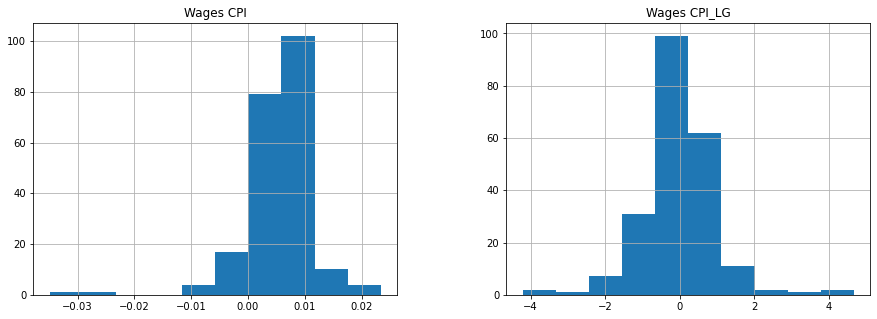

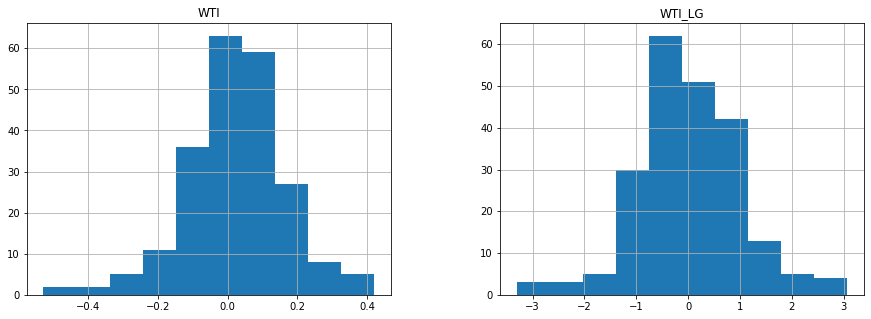

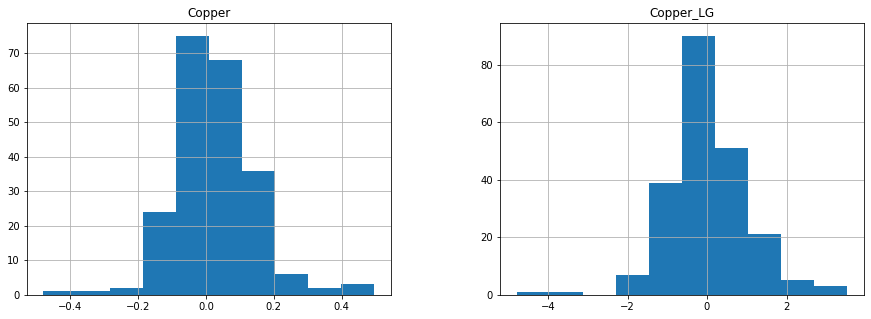

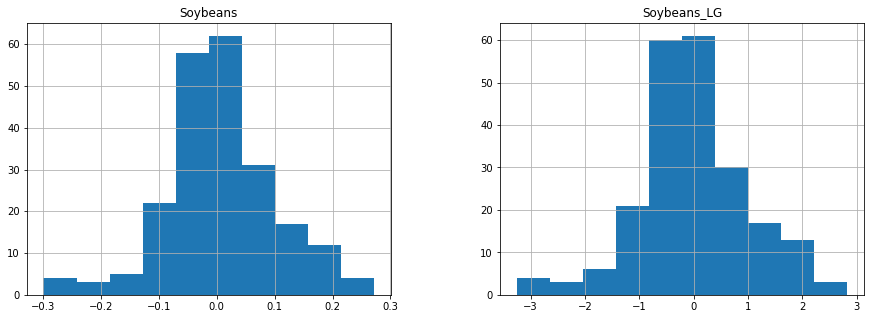

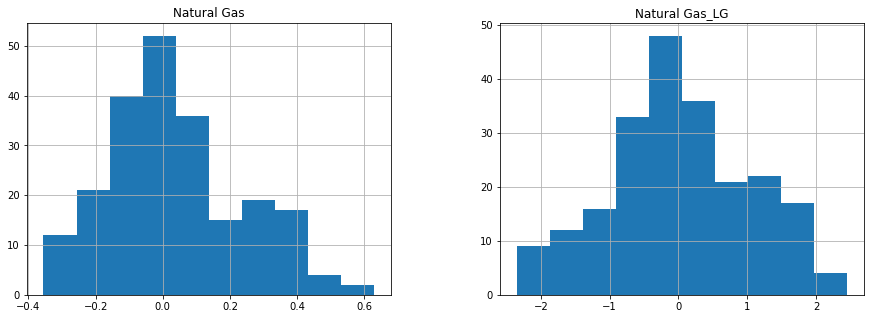

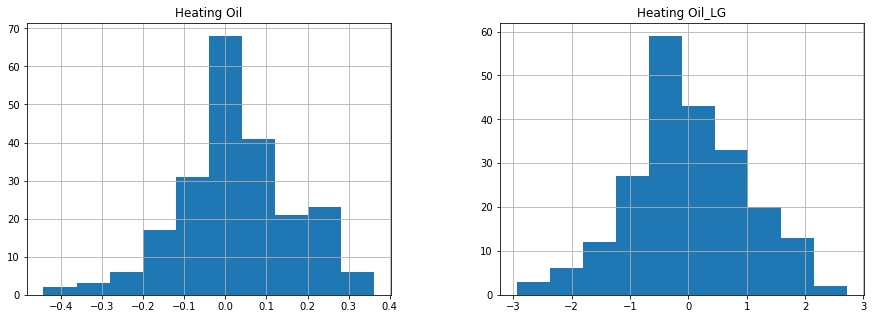

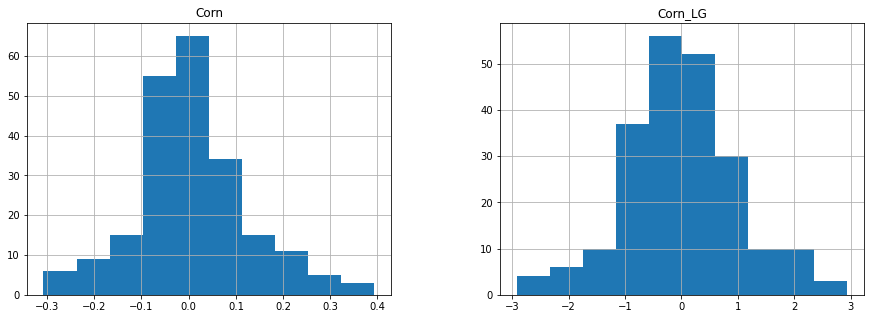

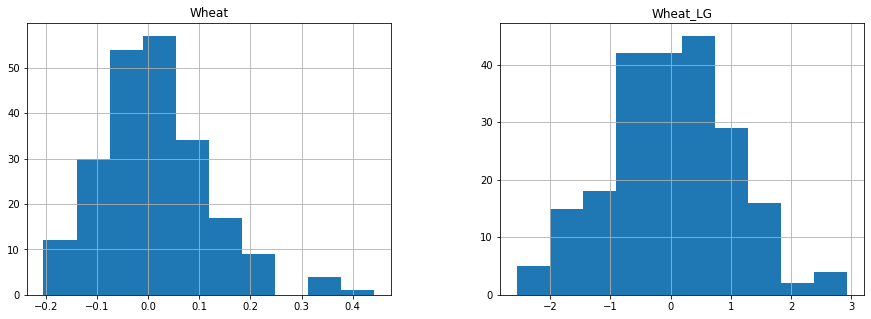

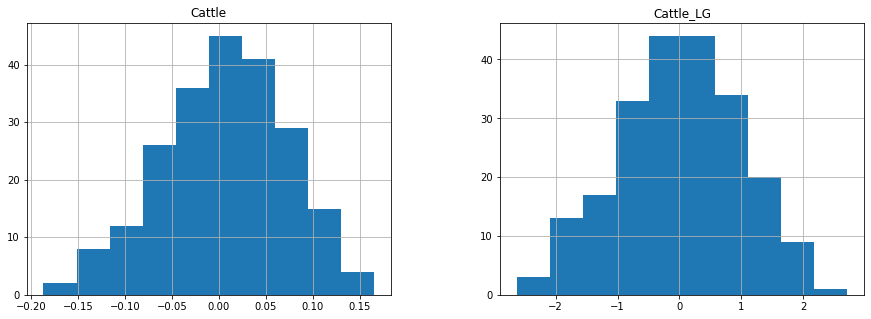

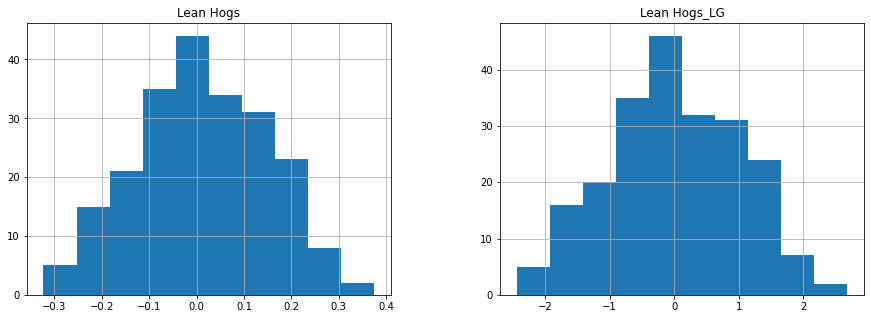

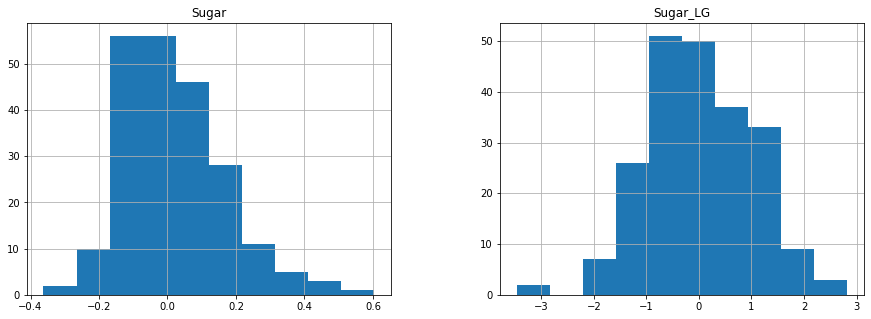

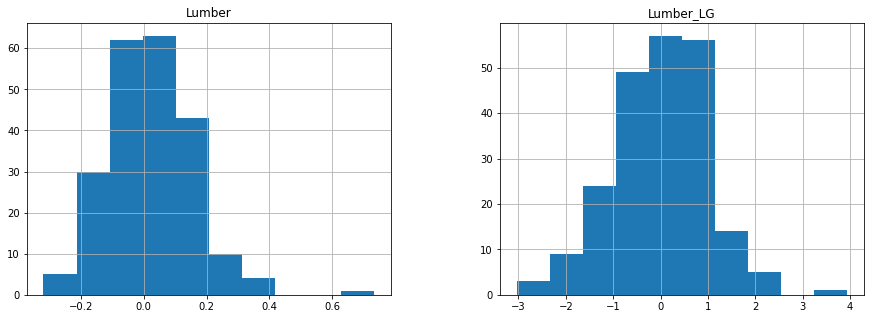

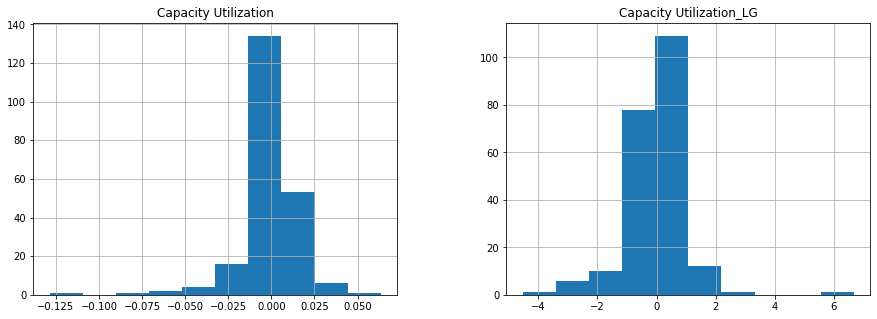

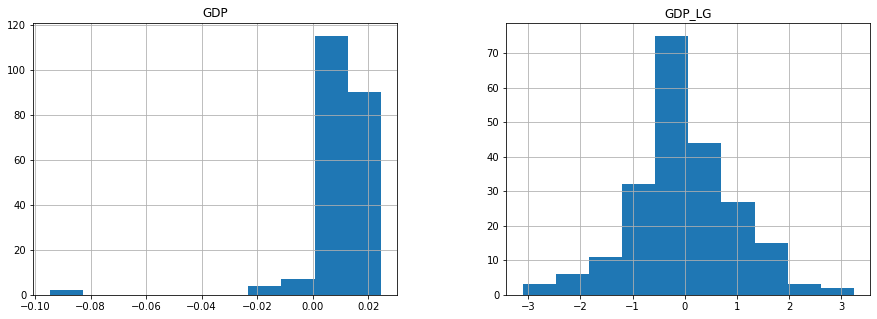

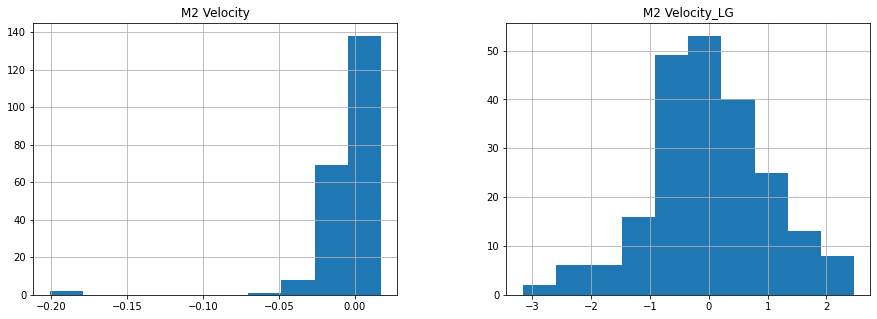

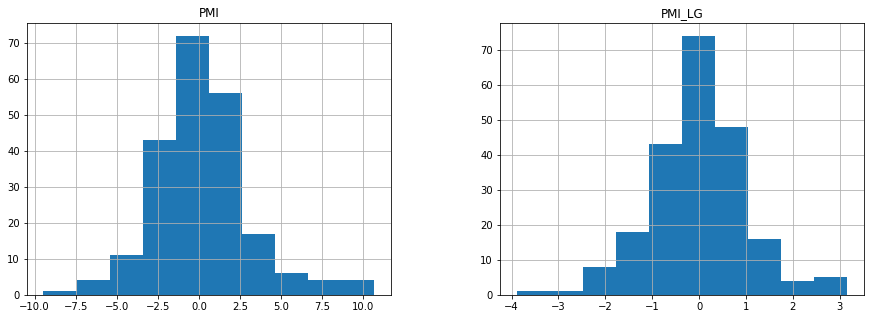

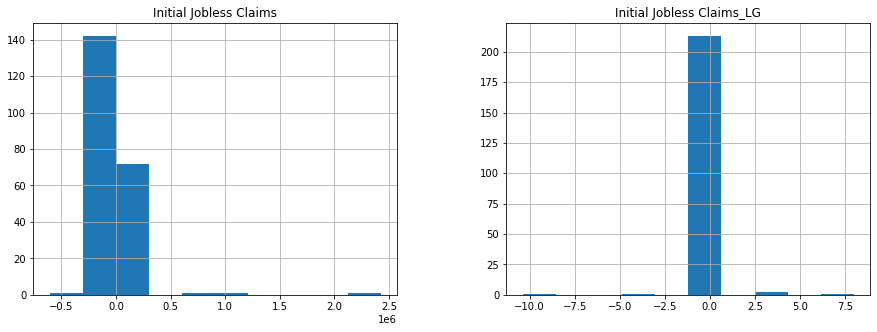

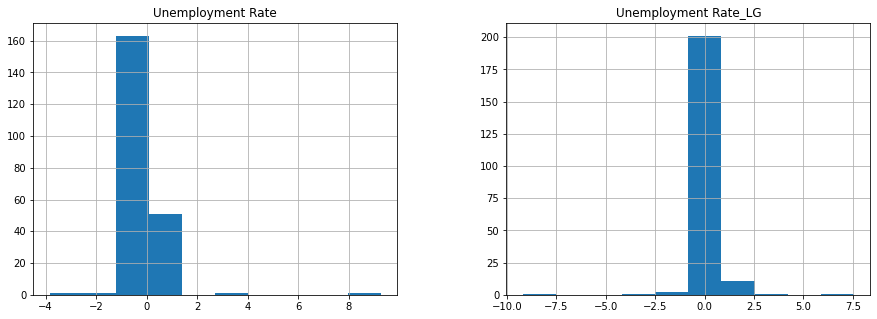

In [69]:
# to visually confirm one of the variables
X_train_LG[['Wages CPI','Wages CPI_LG']].hist(figsize=(15,5))
X_train_LG[['WTI','WTI_LG']].hist(figsize=(15,5))
X_train_LG[['Copper','Copper_LG']].hist(figsize=(15,5))
X_train_LG[['Soybeans','Soybeans_LG']].hist(figsize=(15,5))
X_train_LG[['Natural Gas','Natural Gas_LG']].hist(figsize=(15,5))
X_train_LG[['Heating Oil','Heating Oil_LG']].hist(figsize=(15,5))
X_train_LG[['Corn','Corn_LG']].hist(figsize=(15,5))
X_train_LG[['Wheat','Wheat_LG']].hist(figsize=(15,5))
X_train_LG[['Cattle','Cattle_LG']].hist(figsize=(15,5))
X_train_LG[['Lean Hogs','Lean Hogs_LG']].hist(figsize=(15,5))
X_train_LG[['Sugar','Sugar_LG']].hist(figsize=(15,5))
X_train_LG[['Lumber','Lumber_LG']].hist(figsize=(15,5))
X_train_LG[['Capacity Utilization','Capacity Utilization_LG']].hist(figsize=(15,5))
X_train_LG[['GDP','GDP_LG']].hist(figsize=(15,5))
X_train_LG[['M2 Velocity','M2 Velocity_LG']].hist(figsize=(15,5))
X_train_LG[['PMI','PMI_LG']].hist(figsize=(15,5))
X_train_LG[['Initial Jobless Claims','Initial Jobless Claims_LG']].hist(figsize=(15,5))
X_train_LG[['Unemployment Rate','Unemployment Rate_LG']].hist(figsize=(15,5))
plt.show()

While they all seem to work, the following appear to either have an outlier issue or `Log Transform` works very well:
   * `Wages CPI`
   * `Capacity Utilization`
   * `GDP`
   * `M2 Velocity`
   * `Initial Jobless Claims`
   * `Unemployment Rate`

We will continue with all.

In [70]:
X_train_LG.drop(columns=prev_cols, inplace=True)

In [71]:
X_train_LG.describe()

,Wages CPI_SS,WTI_SS,Copper_SS,Soybeans_SS,Natural Gas_SS,Heating Oil_SS,Corn_SS,Wheat_SS,Cattle_SS,Lean Hogs_SS,...,Lean Hogs_LG,Sugar_LG,Lumber_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,PMI_LG,USD Index_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,218.000000,2.180000e+02,2.180000e+02
mean,0.694134,0.579751,0.517310,0.538476,0.396675,0.581892,0.446314,0.335362,0.549834,0.479716,...,-3.182979e-17,-1.120409e-17,1.121204e-17,-1.527830e-17,-2.663517e-16,7.766468e-18,4.933617e-18,-0.012799,2.419064e-17,2.495455e-17
std,0.099718,0.153589,0.123627,0.164539,0.201917,0.172532,0.169350,0.165197,0.185796,0.195939,...,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,0.012007,1.002301e+00,1.002301e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.438256e+00,-3.468529e+00,-3.038505e+00,-4.520455e+00,-3.102066e+00,-3.155028e+00,-3.893245e+00,-0.037961,-1.037009e+01,-9.181910e+00
25%,0.667559,0.492937,0.444239,0.455334,0.261206,0.488547,0.340384,0.224550,0.430120,0.358486,...,-6.221477e-01,-6.725542e-01,-6.727191e-01,-3.616021e-01,-5.612664e-01,-4.877854e-01,-5.535478e-01,-0.022312,-5.411911e-02,-2.153957e-01
50%,0.705608,0.573683,0.505297,0.529197,0.364864,0.574937,0.436468,0.327345,0.563600,0.470908,...,-4.833773e-02,-1.004732e-01,3.617663e-02,6.764572e-02,-5.308771e-02,-1.275063e-01,5.063059e-02,-0.012357,5.152233e-02,-5.318401e-02
75%,0.736719,0.682071,0.583506,0.625757,0.509995,0.691239,0.534231,0.433499,0.685891,0.621831,...,7.255195e-01,6.539755e-01,6.712153e-01,4.176488e-01,5.796108e-01,5.338289e-01,5.976906e-01,-0.005258,1.047383e-01,1.530685e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.680506e+00,2.825044e+00,3.940244e+00,6.673082e+00,3.243365e+00,2.464245e+00,3.163166e+00,0.019044,7.995727e+00,7.548036e+00


All have a **Standard Deviation** `std` of 1 so we will continue to the next.

Next `X_test_LG`

In [72]:
LG_scaler.fit(X_test_LG[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'PMI',
       'Initial Jobless Claims', 'Unemployment Rate']])

PowerTransformer()

In [73]:
X_test_LG[['Wages CPI_LG', 'WTI_LG', 'Copper_LG', 'Soybeans_LG', 'Natural Gas_LG', 'Heating Oil_LG',
       'Corn_LG', 'Wheat_LG', 'Cattle_LG', 'Lean Hogs_LG', 'Sugar_LG', 'Lumber_LG',
       'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG', 'PMI_LG', 'USD Index_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG']] = LG_scaler.transform(X_test_LG[['Wages CPI', 'WTI', 'Copper', 'Soybeans', 'Natural Gas', 'Heating Oil',
       'Corn', 'Wheat', 'Cattle', 'Lean Hogs', 'Sugar', 'Lumber',
       'Capacity Utilization', 'GDP', 'M2 Velocity', 'PMI', 'USD Index',
       'Initial Jobless Claims', 'Unemployment Rate']])

In [74]:
X_test_LG.drop(columns=prev_cols, inplace=True)

In [75]:
X_test_LG.describe()

,Wages CPI_SS,WTI_SS,Copper_SS,Soybeans_SS,Natural Gas_SS,Heating Oil_SS,Corn_SS,Wheat_SS,Cattle_SS,Lean Hogs_SS,...,Lean Hogs_LG,Sugar_LG,Lumber_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,PMI_LG,USD Index_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,94.000000,9.400000e+01,9.400000e+01
mean,0.764249,0.485789,0.586517,0.569137,0.448632,0.636256,0.462727,0.440227,0.640257,0.463065,...,-3.307047e-17,-1.181088e-18,-1.181088e-17,7.381802e-18,-3.070830e-16,-5.314897e-17,-1.712578e-17,0.145860,4.473372e-17,-5.905442e-19
std,0.128444,0.146244,0.140130,0.173703,0.209782,0.184222,0.158147,0.155832,0.201739,0.233535,...,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,0.011457,1.005362e+00,1.005362e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.283623e+00,-2.829581e+00,-2.755155e+00,-5.261928e+00,-5.797385e+00,-4.303363e+00,-4.282937e+00,0.121811,-5.979241e+00,-6.023089e+00
25%,0.720221,0.422502,0.509709,0.463504,0.323043,0.554880,0.376488,0.338498,0.496629,0.281153,...,-7.644602e-01,-5.711489e-01,-5.876953e-01,-2.412716e-01,-2.248710e-01,-4.571075e-01,-6.473741e-01,0.138922,5.552998e-02,-1.138032e-01
50%,0.791061,0.502673,0.565671,0.549194,0.432017,0.659235,0.446268,0.412963,0.658467,0.438592,...,-2.848480e-02,-6.568799e-02,-4.818858e-03,4.087652e-02,-3.376597e-02,-9.016489e-02,-8.917637e-02,0.145111,7.031153e-02,-3.995771e-03
75%,0.827197,0.559360,0.666665,0.666229,0.596986,0.762352,0.546416,0.516540,0.801623,0.621741,...,7.314580e-01,6.583968e-01,6.680842e-01,2.524406e-01,1.075821e-01,4.323252e-01,5.346166e-01,0.152407,8.814947e-02,1.380030e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.051306e+00,2.544649e+00,2.601462e+00,5.405416e+00,4.096071e+00,3.800724e+00,2.875160e+00,0.184285,6.294503e+00,5.325166e+00


Next `y_train_LG`

In [76]:
LG_scaler.fit(y_train_LG[['Inflation']])

PowerTransformer()

In [77]:
y_train_LG['Inflation_LG'] = LG_scaler.transform(y_train_LG[['Inflation']])
y_train_LG.drop(columns='Inflation', inplace=True)

In [78]:
y_train_LG.describe()

,Inflation_LG
count,2.180000e+02
mean,-1.476902e-17
std,1.002301e+00
min,-4.657212e+00
25%,-4.084960e-01
50%,1.670749e-03
75%,4.547053e-01
max,4.837648e+00


Next `y_test_LG`

In [79]:
y_test_LG

,Inflation
228,0.176
9,-2.217
57,0.516
60,0.001
25,-0.971
...,...
304,-0.327
19,-0.185
147,1.326
92,0.072


In [80]:
LG_scaler.fit(y_test_LG[['Inflation']])

PowerTransformer()

In [81]:
y_test_LG['Inflation_LG'] = LG_scaler.transform(y_test_LG[['Inflation']])
y_test_LG.drop(columns='Inflation', inplace=True)

In [82]:
y_test_LG.describe()

,Inflation_LG
count,9.400000e+01
mean,-2.244068e-17
std,1.005362e+00
min,-4.365095e+00
25%,-5.681602e-01
50%,-6.055839e-02
75%,4.722805e-01
max,3.971748e+00


Finally `y_tr_pred_LG`

In [83]:
reg_new_LG = LinearRegression()

In [84]:
reg_new_LG = LogisticRegression(X_train_LG,y_train_LG)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass dual=     Inflation_LG
101     -0.554933
193      0.808334
72      -0.416118
298      0.076718
15       0.478078
..            ...
188     -1.049346
71      -0.307001
106      0.487913
270      0.505117
102     -0.653323

[218 rows x 1 columns] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [85]:
lm_LG = LinearRegression().fit(X_train_LG, y_train_LG)

In [86]:
y_tr_pred_LG = lm_LG.predict(X_train_LG)
y_te_pred_LG = lm_LG.predict(X_test_LG)

In [87]:
median_r2_LG = r2_score(y_train, y_tr_pred_LG), r2_score(y_test, y_te_pred_LG)
median_r2_LG

(0.46640375119172583, -290759.06394961884)

In [88]:
median_mae_LG = mean_absolute_error( y_train, y_tr_pred_LG), mean_absolute_error( y_test, y_te_pred_LG )
median_mae_LG

(0.4304361877744126, 471.72355111503026)

In [89]:
median_mse_LG = mean_squared_error( y_train, y_tr_pred_LG ), mean_squared_error( y_test, y_te_pred_LG )
median_mse_LG

(0.34202006581381056, 222534.768384436)

# 4.0 Conclusion

A noteable amount of information was 're-arranged' so we will quickly show the r2-values for each of the three scaling approaches side by side:

In [90]:
print(' SS',median_r2, '\n','MM',median_r2_MM,'\n','LG',median_r2_LG)

 SS (0.41854924961510787, 0.32345385108737135) 
 MM (-0.2443881036729123, 0.002358370506340801) 
 LG (0.46640375119172583, -290759.06394961884)


The `Log Transformation` approach ended the best on the `Training` set but negative on the `Testing` set. Meanwhile the `Standard Scaler` had a healthy balance for both the `Training` & `Testing` sets. 

There may be an error with the `Log Transformation` testing set & `MinMax` as a whole; to be reviewed later.

**Although I believe further review needs to be conduced on the Data Wrangling from the previous section, a possible hybrid between `Standard Scaler` & `Log Transformation` may yield better results for this data frame without categorical data.**